In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as snsaa

In [9]:
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")

In [13]:
duncan = duncan_prestige.data

In [14]:
duncan.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [16]:
duncan['type'].value_counts()

bc      21
prof    18
wc       6
Name: type, dtype: int64

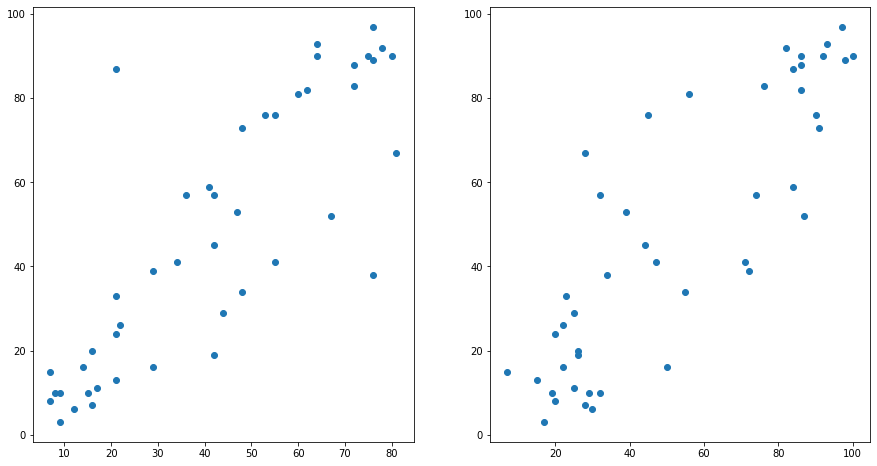

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
ax[0].scatter(duncan.income, duncan.prestige)
ax[1].scatter(duncan.education, duncan.prestige)

In [19]:
duncan.corr()

,income,education,prestige
income,1.000000,0.724512,0.837801
education,0.724512,1.000000,0.851916
prestige,0.837801,0.851916,1.000000


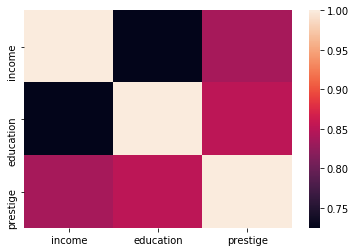

In [20]:
sns.heatmap(duncan.corr())

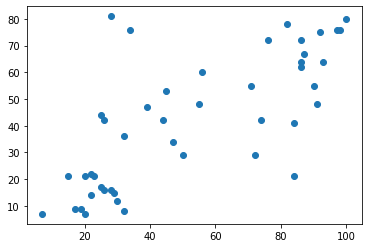

In [21]:
plt.scatter(duncan.education, duncan.income)

In [22]:
import numpy as np

In [28]:
np.polyfit(duncan['education'], duncan.prestige, deg = 2)

array([6.00886572e-04, 8.34835719e-01, 1.63355062e+00])

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
model = sm.OLS(duncan['prestige'], duncan[['education', 'income']])

In [31]:
fit_model = model.fit()

In [32]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               prestige   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              377.6
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                    5.30e-28
Time:                        19:29:56   Log-Likelihood:                         -180.04
No. Observations:                  45   AIC:                                      364.1
Df Residuals:                      43   BIC:                                      367.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
education      0.4958      0.093      5.343      0.000       0.309       0.683
income         0.5483      0.116      4.743      0.000       0.315       0.781
==============================================================================
Omnibus:                        0.724   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.366
Skew:                           0.219   Prob(JB):                        0.833
Kurtosis:                       3.055   Cond. No.                         5.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X = duncan[['education', 'income']]

In [34]:
X = sm.add_constant(X)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
y = duncan['prestige']

In [36]:
model = sm.OLS(y, X)

In [37]:
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           8.65e-17
Time:                        19:36:15   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0647      4.272     -1.420      0.163     -14.686       2.556
education      0.5458      0.098      5.555      0.000       0.348       0.744
income         0.5987      0.120      5.003      0.000       0.357       0.840
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X = duncan.education
y = duncan.prestige
model = sm.OLS(y, X)
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               prestige   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              492.3
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                    1.60e-25
Time:                        19:39:58   Log-Likelihood:                         -189.50
No. Observations:                  45   AIC:                                      381.0
Df Residuals:                      44   BIC:                                      382.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
education      0.9061      0.041     22.187      0.000       0.824       0.988
==============================================================================
Omnibus:                        1.144   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.958
Skew:                           0.349   Prob(JB):                        0.619
Kurtosis:                       2.844   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X = duncan.income
y = duncan.prestige
model = sm.OLS(y, X)
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               prestige   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              446.8
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                    1.13e-24
Time:                        19:40:34   Log-Likelihood:                         -191.49
No. Observations:                  45   AIC:                                      385.0
Df Residuals:                      44   BIC:                                      386.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
income         1.1244      0.053     21.138      0.000       1.017       1.232
==============================================================================
Omnibus:                       10.122   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               20.552
Skew:                           0.382   Prob(JB):                     3.44e-05
Kurtosis:                       6.221   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
house_nums = df.select_dtypes(['int', 'float'])

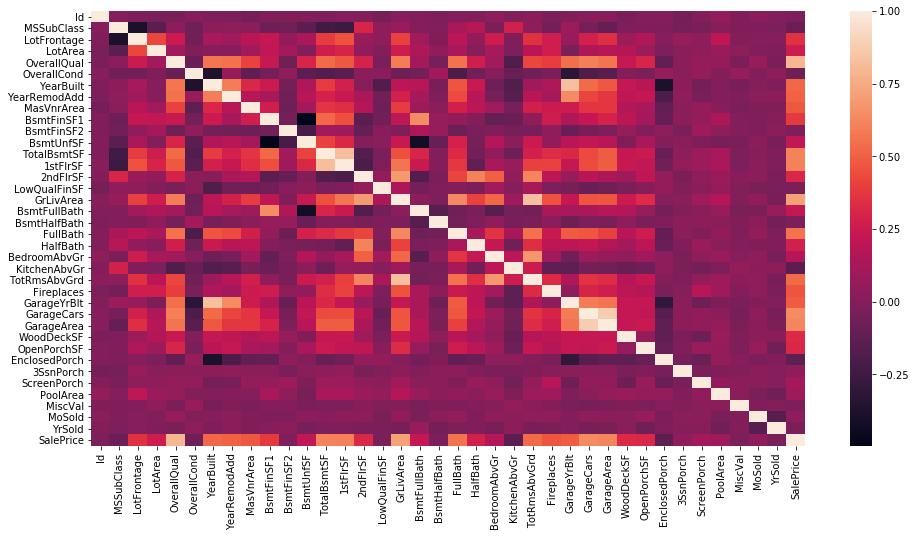

In [47]:
plt.figure(figsize = (16, 8))
sns.heatmap(house_nums.corr())

In [53]:
X = house_nums.dropna().drop('SalePrice', axis = 1)

In [54]:
y = house_nums.dropna().SalePrice

In [55]:
model = sm.OLS(y, X)
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              946.5
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                        0.00
Time:                        19:49:43   Log-Likelihood:                         -13358.
No. Observations:                1121   AIC:                                  2.679e+04
Df Residuals:                    1086   BIC:                                  2.696e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -1.1973      2.657     -0.451      0.652      -6.410       4.016
MSSubClass     -200.1887     34.490     -5.804      0.000    -267.863    -132.514
LotFrontage    -115.5376     61.186     -1.888      0.059    -235.594       4.519
LotArea           0.5414      0.157      3.439      0.001       0.233       0.850
OverallQual    1.867e+04   1478.437     12.630      0.000    1.58e+04    2.16e+04
OverallCond    5239.6093   1367.247      3.832      0.000    2556.864    7922.354
YearBuilt       315.4475     87.485      3.606      0.000     143.789     487.106
YearRemodAdd    119.3947     86.644      1.378      0.168     -50.613     289.402
MasVnrArea       31.4012      7.019      4.474      0.000      17.629      45.173
BsmtFinSF1        9.6641      3.126      3.091      0.002       3.530      15.799
BsmtFinSF2        0.6956      5.582      0.125      0.901     -10.257      11.649
BsmtUnfSF        -2.6795      2.935     -0.913      0.361      -8.438       3.080
TotalBsmtSF       7.6802      4.221      1.820      0.069      -0.602      15.962
1stFlrSF         14.4955      8.478      1.710      0.088      -2.141      31.132
2ndFlrSF         15.1348      7.709      1.963      0.050       0.008      30.262
LowQualFinSF      1.8419     20.935      0.088      0.930     -39.235      42.919
GrLivArea        31.4721      7.762      4.055      0.000      16.242      46.702
BsmtFullBath   9079.1386   3191.332      2.845      0.005    2817.264    1.53e+04
BsmtHalfBath   2434.2080   5068.455      0.480      0.631   -7510.865    1.24e+04
FullBath       5482.0331   3520.822      1.557      0.120   -1426.350    1.24e+04
HalfBath      -1072.4533   3317.313     -0.323      0.747   -7581.522    5436.615
BedroomAbvGr  -1.023e+04   2153.656     -4.749      0.000   -1.45e+04   -6001.573
KitchenAbvGr  -2.198e+04   6703.259     -3.279      0.001   -3.51e+04   -8826.738
TotRmsAbvGrd   5456.0284   1486.063      3.671      0.000    2540.149    8371.908
Fireplaces     4358.0056   2186.566      1.993      0.047      67.633    8648.379
GarageYrBlt     -47.5369     91.010     -0.522      0.602    -226.112     131.038
GarageCars     1.683e+04   3486.816      4.825      0.000    9983.548    2.37e+04
GarageArea        6.3290     12.119      0.522      0.602     -17.450      30.108
WoodDeckSF       21.5000     10.015      2.147      0.032       1.849      41.151
OpenPorchSF      -2.4418     19.453     -0.126      0.900     -40.612      35.729
EnclosedPorch     7.1465     20.598      0.347      0.729     -33.271      47.564
3SsnPorch        33.6385     37.560      0.896      0.371     -40.060     107.336
ScreenPorch      58.0373     20.398      2.845      0.005      18.014      98.061
PoolArea        -60.9430     29.

In [56]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
X = df[['LotFrontage', 'LotArea', 'Street', 'SalePrice']]

In [71]:
X.head()

,LotFrontage,LotArea,Street,SalePrice
0,65.0,8450,Pave,208500
1,80.0,9600,Pave,181500
2,68.0,11250,Pave,223500
3,60.0,9550,Pave,140000
4,84.0,14260,Pave,250000


In [72]:
X = pd.get_dummies(X, drop_first=True)

In [73]:
X= X.dropna()#
y = X['SalePrice']
X = X.drop('SalePrice', axis = 1)

In [74]:
model = sm.OLS(y, X)
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              2317.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                        0.00
Time:                        19:57:13   Log-Likelihood:                         -15207.
No. Observations:                1201   AIC:                                  3.042e+04
Df Residuals:                    1198   BIC:                                  3.043e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
LotFrontage   923.4260     98.742      9.352      0.000     729.699    1117.153
LotArea         2.1103      0.308      6.857      0.000       1.507       2.714
Street_Pave  9.549e+04   6587.157     14.497      0.000    8.26e+04    1.08e+05
==============================================================================
Omnibus:                      409.146   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2063.515
Skew:                           1.506   Prob(JB):                         0.00
Kurtosis:                       8.672   Cond. No.                     3.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [77]:
lr.score(X, y)

0.16142238886406446

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [ ]:
boston = load_boston()

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [ ]:
df['price'] = boston.target

In [ ]:
df.head()

In [ ]:
plt.scatter(df['AGE'], df['price'])

In [ ]:
model = sm.OLS(df['AGE'], df['price'])

In [ ]:
ex = model.fit()

In [ ]:
ex.summary2()

In [ ]:
data = sm.datasets.get_rdataset("Guerry", "HistData").data

In [ ]:
data

In [ ]:
data.info()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [ ]:
plt.scatter(data['Literacy'], np.log(data['Pop1831']))

In [ ]:
from statsmodels.datasets.longley import load_pandas

In [ ]:
X = load_pandas().exog
y = load_pandas().endog

In [ ]:
X = sm.add_constant(X)

In [ ]:
X

In [ ]:
y

In [ ]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
ols_results.summary()